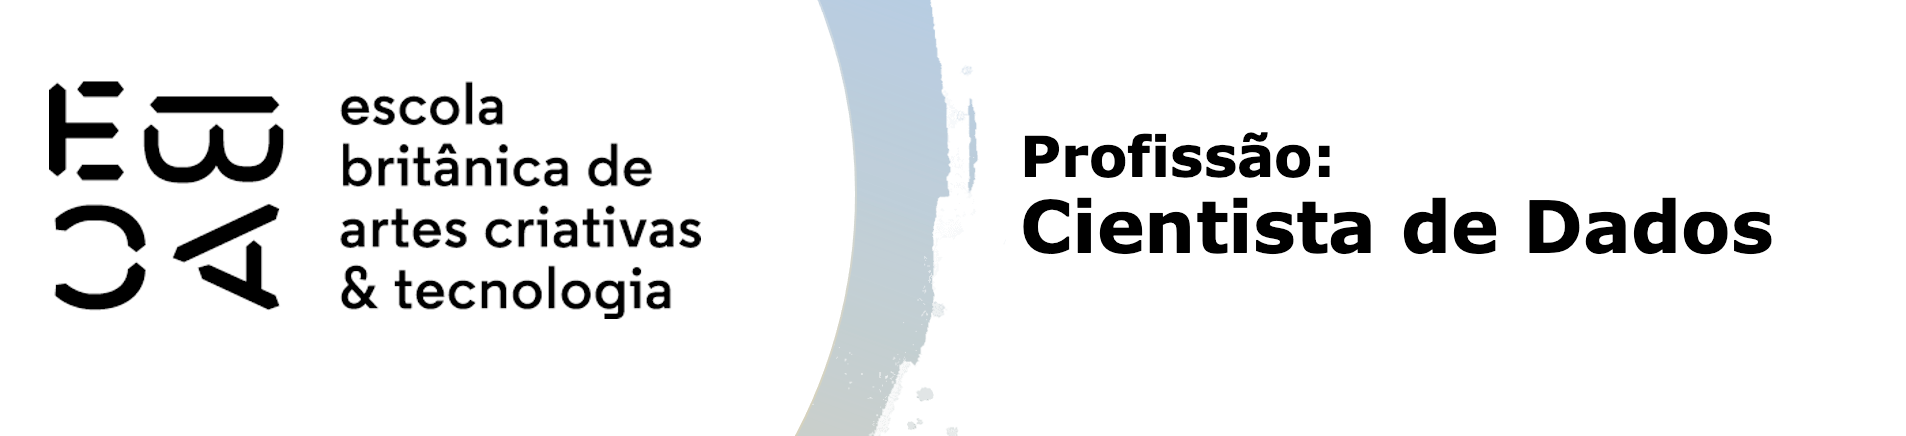

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

In [507]:
df.categoria.nunique()

9

In [508]:
df.categoria.unique()

array(['Mercado', 'Auto posto', 'Restaurantes', 'Farmácia',
       'não definido', 'Construção', 'Alimentos', 'Vestuário', 'Varejo'],
      dtype=object)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

<Axes: >

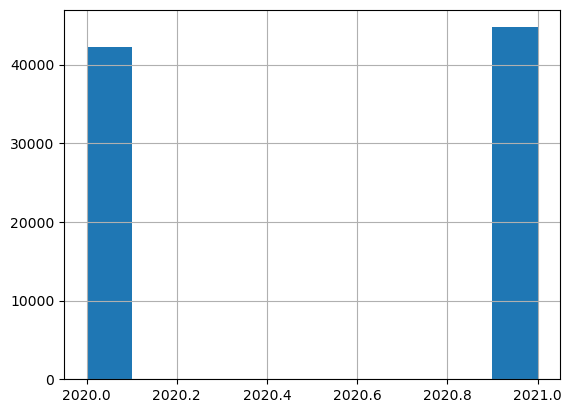

In [510]:
df_  = df[df['Ano'] >= 2020]
df_.Ano.hist()

In [511]:
df_.loc[:,'Retorno_cat'] = df['Retorno'].apply(lambda x: True if x > 0 else False)

C:\Users\User\AppData\Local\Temp\ipykernel_2824\1090514957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'Retorno_cat'] = df['Retorno'].apply(lambda x: True if x > 0 else False)


Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento

In [513]:
tab  = pd.crosstab(df_.Retorno_cat,df_.categoria).T

In [514]:
tab

Retorno_cat,False,True
categoria,,
Alimentos,1605,3442
Auto posto,404,135
Construção,8523,7523
Farmácia,6604,3582
Mercado,14379,13177
Restaurantes,552,1626
Varejo,4365,701
Vestuário,1477,443
não definido,11717,6689


In [515]:
total = tab.sum()
total

Retorno_cat
False    49626
True     37318
dtype: int64

In [516]:
total = tab.sum()
tab.loc['total'] = total
tab

Retorno_cat,False,True
categoria,,
Alimentos,1605,3442
Auto posto,404,135
Construção,8523,7523
Farmácia,6604,3582
Mercado,14379,13177
Restaurantes,552,1626
Varejo,4365,701
Vestuário,1477,443
não definido,11717,6689


In [517]:
tab['Odds'] = tab[True] / tab[False]

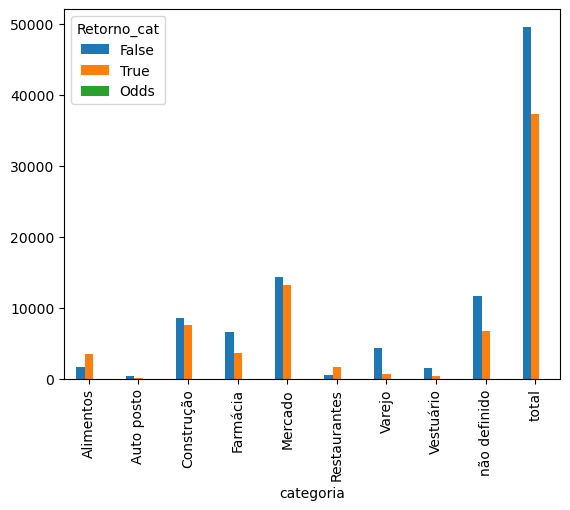

In [518]:
tab.plot.bar();


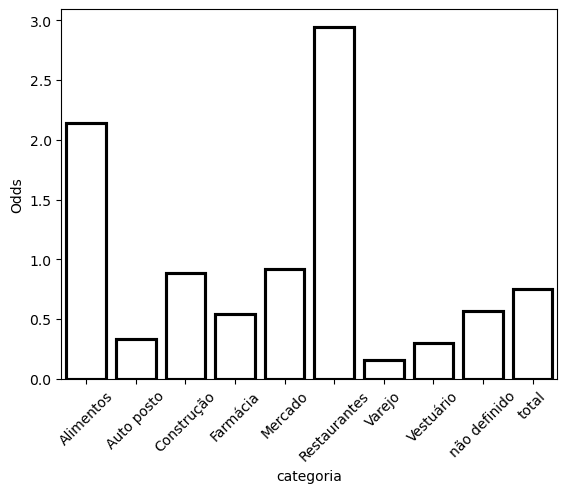

In [519]:
import seaborn as sns

sns.barplot(data=tab,x=tab.index,y='Odds',fill=False,color='black')
plt.xticks(rotation=45);


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [521]:
tab['Total'] = tab[False] + tab[True]

tab['Odds_ratio'] = tab['Odds']/ tab.loc['total','Odds']
tab['Logit'] = np.log(tab.Odds)
tab['WOE'] = np.log(tab.Odds_ratio)

In [522]:
tab

Retorno_cat,False,True,Odds,Total,Odds_ratio,Logit,WOE
categoria,,,,,,,
Alimentos,1605,3442,2.144548,5047,2.851850,0.762929,1.047968
Auto posto,404,135,0.334158,539,0.444369,-1.096140,-0.811101
Construção,8523,7523,0.882670,16046,1.173788,-0.124803,0.160236
Farmácia,6604,3582,0.542399,10186,0.721289,-0.611754,-0.326715
Mercado,14379,13177,0.916406,27556,1.218649,-0.087296,0.197743
Restaurantes,552,1626,2.945652,2178,3.917170,1.080330,1.365369
Varejo,4365,701,0.160596,5066,0.213562,-1.828866,-1.543826
Vestuário,1477,443,0.299932,1920,0.398854,-1.204199,-0.919159
não definido,11717,6689,0.570880,18406,0.759164,-0.560576,-0.275537


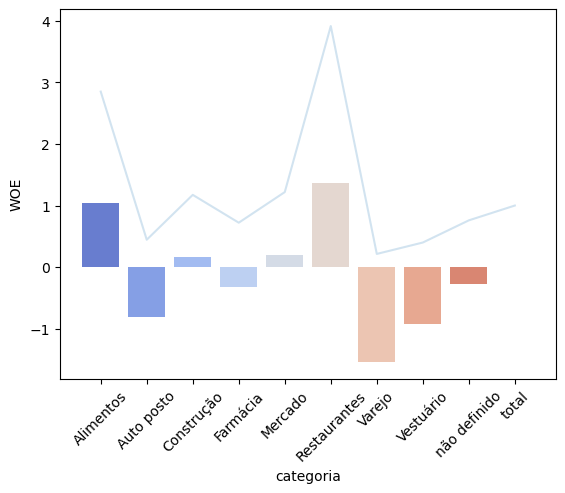

In [523]:
sns.barplot(data=tab,x=tab.index,y='WOE',hue=tab.index,palette='coolwarm')
sns.lineplot(tab,x=tab.index,y='Odds_ratio',alpha=.2)
plt.xticks(rotation=45);

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [525]:
tab  = pd.crosstab(df_.Retorno_cat,df_.categoria).T
tab['Total'] = tab[False] + tab[True]
total = tab.sum()
tab.loc['total'] = total
tab

Retorno_cat,False,True,Total
categoria,,,
Alimentos,1605,3442,5047
Auto posto,404,135,539
Construção,8523,7523,16046
Farmácia,6604,3582,10186
Mercado,14379,13177,27556
Restaurantes,552,1626,2178
Varejo,4365,701,5066
Vestuário,1477,443,1920
não definido,11717,6689,18406


In [526]:
tab['pct_evento'] = tab[True]/tab.loc['total',True]
tab['pct_nao_evento'] = tab[False]/tab.loc['total',False]
tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab['odds_ratio'] = np.exp(tab['woe'])

In [527]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe

In [528]:
tab

Retorno_cat,False,True,Total,pct_evento,pct_nao_evento,woe,odds_ratio,iv_parcial
categoria,,,,,,,,
Alimentos,1605,3442,5047,0.092234,0.032342,1.047968,2.851850,0.062765
Auto posto,404,135,539,0.003618,0.008141,-0.811101,0.444369,0.003669
Construção,8523,7523,16046,0.201592,0.171745,0.160236,1.173788,0.004783
Farmácia,6604,3582,10186,0.095986,0.133075,-0.326715,0.721289,0.012118
Mercado,14379,13177,27556,0.353100,0.289747,0.197743,1.218649,0.012528
Restaurantes,552,1626,2178,0.043571,0.011123,1.365369,3.917170,0.044304
Varejo,4365,701,5066,0.018785,0.087958,-1.543826,0.213562,0.106792
Vestuário,1477,443,1920,0.011871,0.029763,-0.919159,0.398854,0.016445
não definido,11717,6689,18406,0.179243,0.236106,-0.275537,0.759164,0.015668


Naeem Siddiqi recomenda as seguintes regras de bolso para interpretar o IV:

|Faixa|Poder preditivo|
|:-|:-|
|0 a 0,02| Inútil |
|0,02 a 0,1| Fraco |
|0,1 a 0,3| Médio |
|0,3 a 0,5| Forte |
|0,5 ou mais| Suspeito de tão alto |

Lembro que Siddiqi recomenda estas regras de bolso da experiência dele, que é muito vasta em modelos de crédito. Outras áreas de concentração podem tender a apresentar relações mais sutís ou mais evidentes.

In [530]:
tab.loc[:, 'Cat_iv'] = tab['iv_parcial'].apply(
    lambda x: 'Inutil' if 0 <= x <= 0.02 else
              'Fraco' if 0.02 < x <= 0.1 else
              'Médio' if 0.1 < x <= 0.3 else
              'Bom' if 0.3 < x <= 0.5 else
              'Forte'
)

tab

Retorno_cat,False,True,Total,pct_evento,pct_nao_evento,woe,odds_ratio,iv_parcial,Cat_iv
categoria,,,,,,,,,
Alimentos,1605,3442,5047,0.092234,0.032342,1.047968,2.851850,0.062765,Fraco
Auto posto,404,135,539,0.003618,0.008141,-0.811101,0.444369,0.003669,Inutil
Construção,8523,7523,16046,0.201592,0.171745,0.160236,1.173788,0.004783,Inutil
Farmácia,6604,3582,10186,0.095986,0.133075,-0.326715,0.721289,0.012118,Inutil
Mercado,14379,13177,27556,0.353100,0.289747,0.197743,1.218649,0.012528,Inutil
Restaurantes,552,1626,2178,0.043571,0.011123,1.365369,3.917170,0.044304,Fraco
Varejo,4365,701,5066,0.018785,0.087958,-1.543826,0.213562,0.106792,Médio
Vestuário,1477,443,1920,0.011871,0.029763,-0.919159,0.398854,0.016445,Inutil
não definido,11717,6689,18406,0.179243,0.236106,-0.275537,0.759164,0.015668,Inutil


In [531]:
tab.reset_index(inplace=True)
tab

Retorno_cat,categoria,False,True,Total,pct_evento,pct_nao_evento,woe,odds_ratio,iv_parcial,Cat_iv
0,Alimentos,1605,3442,5047,0.092234,0.032342,1.047968,2.851850,0.062765,Fraco
1,Auto posto,404,135,539,0.003618,0.008141,-0.811101,0.444369,0.003669,Inutil
2,Construção,8523,7523,16046,0.201592,0.171745,0.160236,1.173788,0.004783,Inutil
3,Farmácia,6604,3582,10186,0.095986,0.133075,-0.326715,0.721289,0.012118,Inutil
4,Mercado,14379,13177,27556,0.353100,0.289747,0.197743,1.218649,0.012528,Inutil
5,Restaurantes,552,1626,2178,0.043571,0.011123,1.365369,3.917170,0.044304,Fraco
6,Varejo,4365,701,5066,0.018785,0.087958,-1.543826,0.213562,0.106792,Médio
7,Vestuário,1477,443,1920,0.011871,0.029763,-0.919159,0.398854,0.016445,Inutil
8,não definido,11717,6689,18406,0.179243,0.236106,-0.275537,0.759164,0.015668,Inutil
9,total,49626,37318,86944,1.000000,1.000000,0.000000,1.000000,0.000000,Inutil


In [532]:
tab

Retorno_cat,categoria,False,True,Total,pct_evento,pct_nao_evento,woe,odds_ratio,iv_parcial,Cat_iv
0,Alimentos,1605,3442,5047,0.092234,0.032342,1.047968,2.851850,0.062765,Fraco
1,Auto posto,404,135,539,0.003618,0.008141,-0.811101,0.444369,0.003669,Inutil
2,Construção,8523,7523,16046,0.201592,0.171745,0.160236,1.173788,0.004783,Inutil
3,Farmácia,6604,3582,10186,0.095986,0.133075,-0.326715,0.721289,0.012118,Inutil
4,Mercado,14379,13177,27556,0.353100,0.289747,0.197743,1.218649,0.012528,Inutil
5,Restaurantes,552,1626,2178,0.043571,0.011123,1.365369,3.917170,0.044304,Fraco
6,Varejo,4365,701,5066,0.018785,0.087958,-1.543826,0.213562,0.106792,Médio
7,Vestuário,1477,443,1920,0.011871,0.029763,-0.919159,0.398854,0.016445,Inutil
8,não definido,11717,6689,18406,0.179243,0.236106,-0.275537,0.759164,0.015668,Inutil
9,total,49626,37318,86944,1.000000,1.000000,0.000000,1.000000,0.000000,Inutil


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


In [566]:
catego = tab['categoria'].unique()
for i,line in enumerate(tab['odds_ratio']):
    print(f"Risco de chance do evento 'Retorno > 0' para o grupo {catego[i]} é de {round(line*100,2)}%")

Risco de chance do evento 'Retorno > 0' para o grupo Alimentos é de 285.19%
Risco de chance do evento 'Retorno > 0' para o grupo Auto posto é de 44.44%
Risco de chance do evento 'Retorno > 0' para o grupo Construção é de 117.38%
Risco de chance do evento 'Retorno > 0' para o grupo Farmácia é de 72.13%
Risco de chance do evento 'Retorno > 0' para o grupo Mercado é de 121.86%
Risco de chance do evento 'Retorno > 0' para o grupo Restaurantes é de 391.72%
Risco de chance do evento 'Retorno > 0' para o grupo Varejo é de 21.36%
Risco de chance do evento 'Retorno > 0' para o grupo Vestuário é de 39.89%
Risco de chance do evento 'Retorno > 0' para o grupo não definido é de 75.92%
Risco de chance do evento 'Retorno > 0' para o grupo total é de 100.0%


<font color='blue'>**:**</font>

<font color='blue'>**Podemos concluir, a partir do cálculo do Weight of Evidence (WOE), que a chance de ocorrência de eventos na categoria de Restaurantes é 391% maior do que a chance geral, sem considerar as demais categorias. Da mesma forma, a categoria de Alimentos também se destaca, apresentando uma chance 285% maior em relação à chance geral.
Quanto maior a distância do valor do WOE em relação a zero, maior é a evidência de que a categoria está propensa a eventos ou não eventos, permitindo uma discriminação mais clara da probabilidade de ocorrência. Nesse contexto, o setor de Restaurantes parece proporcionar um retorno maior em créditos, enquanto o setor de Varejo tende a oferecer um retorno menor.**</font>

In [588]:
for i,line in enumerate(tab['iv_parcial']):
    print(f"Poder preditivo da categoria {catego[i]} é de {round(line*100,2)}% = {tab.loc[i,'Cat_iv']}")

Poder preditivo da categoria Alimentos é de 6.28% = Fraco
Poder preditivo da categoria Auto posto é de 0.37% = Inutil
Poder preditivo da categoria Construção é de 0.48% = Inutil
Poder preditivo da categoria Farmácia é de 1.21% = Inutil
Poder preditivo da categoria Mercado é de 1.25% = Inutil
Poder preditivo da categoria Restaurantes é de 4.43% = Fraco
Poder preditivo da categoria Varejo é de 10.68% = Médio
Poder preditivo da categoria Vestuário é de 1.64% = Inutil
Poder preditivo da categoria não definido é de 1.57% = Inutil
Poder preditivo da categoria total é de 0.0% = Inutil


<font color='blue'>**Ao interpretar o Information Value (IV) para a variável categoria, o valor de 27,88% indica um poder preditivo moderado, sugerindo uma capacidade razoável de distinguir entre eventos e não eventos.**</font>
